# 无监督学习
## 聚类Clustering
    将数据集划分到几个子集
    基本目标-分组，层级聚类，并能识别噪声，分组依赖距离
    距离衡量：闵氏距离、马氏距离、余弦相似度、
#### 闵氏距离Minkowski
    设有两个向量<x1,x2...>,<y1,y2,...>，d = (Σ|xi-yi|^p)^(1/p)
##### 欧几里得距离Euclidean
    p=2时，最常见的两点之间或多点之间的距离表示法，又称之为欧几里得度量，它定义于欧几里得空间中，为点 x = (x1,...,xn) 和 y = (y1,...,yn) 之间的距离。欧氏距离虽然很有用，但也有明显的缺点。它将样品的不同属性（即各指标或各变量量纲）之间的差别等同看待，这一点有时不能满足实际要求。例如，在教育研究中，经常遇到对人的分析和判别，个体的不同属性对于区分个体有着不同的重要性。因此，欧氏距离适用于向量各分量的度量标准统一的情况。
##### 曼哈顿距离Manhattan
    p=1时，定义曼哈顿距离的正式意义为L1-距离或城市区块距离，也就是在欧几里得空间的固定直角坐标系上两点所形成的线段对轴产生的投影的距离总和。例如在平面上，坐标（x1, y1）的点P1与坐标（x2, y2）的点P2的曼哈顿距离为：|x1-x2|+|y1-y2|，要注意的是，曼哈顿距离依赖座标系统的转度，而非系统在座标轴上的平移或映射。当坐标轴变动时，点间的距离就会不同。
    通俗来讲，想象你在曼哈顿要从一个十字路口开车到另外一个十字路口，驾驶距离是两点间的直线距离吗？显然不是，除非你能穿越大楼。而实际驾驶距离就是这个“曼哈顿距离”，这也是曼哈顿距离名称的来源， 同时，曼哈顿距离也称为城市街区距离(City Block distance)。
#### 马氏距离Mahalanobis
    闵氏距离缺陷：将每个维度看成时等权的，没有考虑特征之间的相关性。马氏距离为解决这两个问题，设有特征向量x，y，d = ((x-y)'s^-1(x-y))^1/2,其中s为协方差矩阵，对角线上的元素用于表示每个维度的权重，其它为两两特征维度之间的相关性，‘表示转置，-1表示求逆矩阵

### K-means算法
     假定聚类的每个分组中有一个中心点，算法的目的就是找到这些中心的合适坐标，使得所有样本向量到其对应的分组中心距离最小。算法结果在一定程度上依赖于开始的随机中心点
#### 初始时，随机选择K个分组中心，为每个中心找到各自的样本数据，具体做法为一个样本数据与哪个中心点距离小则划分到哪个中心点；
#### 然后在每个组内用该中心点重新计算出更合适的中心点，计算时遵循距离最小
#### 重复迭代至收敛，收敛条件为距离低于某个要求或者新中心点不在变化
#### 算法本身不保证全局最优解，故在进行多轮从初始化到迭代收敛的完整过程，最后选取其中距离最小的一轮作为最后结果
#### 如何选取K即分组个数，在没有固定标准时，一般K值越大距离越小，但当K增大到和样本值相等时，虽然距离为0，但聚类也就失去了意义，故因应该选择对距离减小效果已经不显著时的K值，即找到距离关于K值曲线的拐点

In [1]:
## scikit-learn聚类实现

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

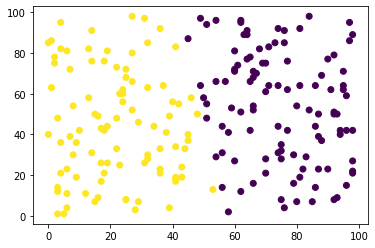

In [2]:
from sklearn.cluster import KMeans

X = np.random.randint(100, size=(200, 2))

# 初始化        分组个数K     
kmeans = KMeans(n_clusters=2).fit(X)

# x0 = np.argwhere(kmeans.labels_== 0).reshape(-1, )
# x1 = np.argwhere(kmeans.labels_ == 1).reshape(-1, )


plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)


### 近邻算法AP
    无需指定K值，通过迭代找到质心，质心需为样本数据中的某个点。迭代更新责任度矩阵r和可用度矩阵a，更新规则为：r(i,k)的新值等于原始相似度s（i，k）减去上一轮迭代i节点收到的最大“相似度+可用度”组合，可以理解为如果有其它成员更想做质心，则节点i给k的责任度减小；a（i，k）的新值等于其自责任a(k,k)加上其它成员发给k的所有正向责任度的和，可以理解为有越多的成员想让k成为质心，则k越自告奋勇当质心。对i来说，r（i，k）+a（i，k）取得最大值时k即为i所在组的质心，迭代收敛条件为若干次迭代结果没有发生变化或达到最大迭代次数
#### 质心exemplar
    聚类中每一组的核心成员
#### 参考度preference
    数据集中每一个数据想成为质心的初始参考值
#### 相似度similarity
    记为s（i，k）一般为两个特征向量之间的距离
#### 责任度responsibility
    为矩阵r(i, k)，i成员想让k成为质心并加入的值大小
#### 可用度availability
    矩阵a(i,k)， k成员对i表现出来的想成为质心的值大小

In [3]:
from sklearn.cluster import AffinityPropagation

af = AffinityPropagation(preference=-2000, ).fit(X)
max(af.labels_)

13

### 高斯混合模型Gaussian Mixture Model，GMM
    假设训练数据集是在若干个多元高斯分布中随机采样获得的结果，学习的目标是获得这些高斯分布的均值和方差。预测结果为样本在哪个高斯分布中概率大就属于哪一组
#### 中心极限定理
    指出了大量随机变量近似服从正态分布
#### 最大似然估计
    似然度P(D|H)中D为样本，H为概率模型参数，最大似然估计就是找到在给定样本集D的情况下能使似然度值最大化的一组模型参数。假设样本之间相互独立，分组数位K，每个样本发生的概率
    P(di|H) = Σp(k)p(di|k) = Σp(k)N(di|μk， σk）
    其中p(k)为每个分组出现的概率，N(μk，σk)是K个多元高斯分布，GMM目标就是寻找p(k)、μk、 σk使得似然度最大
#### EM算法
    即迭代，假设一组起点p(k)、μk、 σk，分两步迭代搜索修改这些参数
    1、计算每个样本i在这些参数下是由高斯分布k产生的概率λ(i,k)；2、用这些λ(i,k)推选出新的p(k)、μk、 σk
#### 协方差矩阵Covariance
    球面协方差矩阵spherical，只有对角线上由一个相同的元素，其它位置均为0
    对角协方差矩阵diagonal，对角线上每个元素表示不同，其它位置为0
    完全协方差矩阵full，每一个元素表示都不同，它能表达最完整的高斯分布信息
    绑定协方差矩阵tied，比full多了个限定条件为GMM中所有高斯模型都采用同一个协方差矩阵

In [4]:
from sklearn.mixture import GaussianMixture

from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)

gmm = GaussianMixture(n_components=3).fit(x_train)

# 打印模型信息 迭代次数       每个分组比重            均值                    协方差矩阵    能较好分成3类
print('n=', gmm.n_iter_, '\nweights=', gmm.weights_, '\nmeans=', gmm.means_, '\ncovariance=', gmm.covariances_)

n= 15 
weights= [0.05492062 0.66666891 0.27841047] 
means= [[5.52180121 4.120195   1.3794938  0.26057033]
 [6.17166105 2.8616648  4.8349881  1.68832865]
 [4.92899821 3.28986687 1.43996413 0.2279599 ]] 
covariance= [[[ 0.04558628  0.00959567 -0.01158438  0.00868274]
  [ 0.00959567  0.02975724  0.01451127  0.00289253]
  [-0.01158438  0.01451127  0.01366511 -0.00069394]
  [ 0.00868274  0.00289253 -0.00069394  0.01437354]]

 [[ 0.33670647  0.10308333  0.35801032  0.15101008]
  [ 0.10308333  0.11769888  0.13234782  0.09205506]
  [ 0.35801032  0.13234782  0.6136493   0.29175721]
  [ 0.15101008  0.09205506  0.29175721  0.20070405]]

 [[ 0.09747843  0.06181939  0.033174    0.00880448]
  [ 0.06181939  0.11194559  0.01163487  0.00467987]
  [ 0.033174    0.01163487  0.02635539  0.00285641]
  [ 0.00880448  0.00467987  0.00285641  0.00683479]]]


### 密度聚类DBSCAN   Density Based Spatial Clustering of Applications with Noise
    每个分组没有绝对的中心点，并且每个样本都可以成为其它样本的核心以扩展自己的分组。优点是可以更好的聚类非凸数据集，并且不需要在训练前指定分组数量，能有效识别噪声点
#### E邻域与邻居
    用来衡量两个样本之间的关系。如果两个样本之间的距离小于E邻域，则称这两个样本互为邻居
#### MinPts与核心点
    如果一个样本的邻居数量大于等于MinPts个，则称该样本为核心点；每个分组至少有一个核心点
#### 噪声点
    如果一个样本任何邻居和其本身都不是核心点则称为噪声点，不属于任何分组
#### 边界点
    除核心点、噪声点以外的样本称为边界点
#### 聚类算法
    将边界点划分到与它互为邻居的核心点相同的分组中，如果两个核心点互为邻居则合并为一个组。分组靠核心点传递不断扩张当前分组，如果无法继续扩张则找下一个核心点直到所有样本都被分组，噪声点除外。算法不稳定，多次训练结果可能不同
#### 邻居搜索
    算法关键在于搜索邻居，暴力法为对每一个结点轮询其它结点，复杂度为O(n2),加速算法为先建立树形结构，有ball_tree, kd_tree, brute，具体还未了解。

labels= 3


Text(0.5, 1.0, 'DBSCAN')

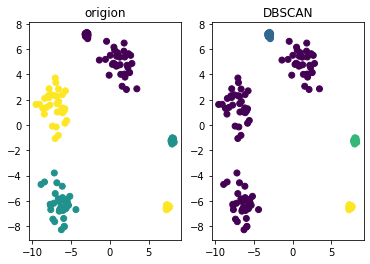

In [5]:
from sklearn.cluster import DBSCAN

# 生成数据集                         数量           维度     int种类或者中心点[[a,b]]  方差
data1, target1 = datasets.make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1)
data2, target2 = datasets.make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=0.1)

data = np.concatenate((data1, data2))
target = np.concatenate((target1, target2))

# 初始化         E邻域值  MinPts
dbscan = DBSCAN(eps=0.2, min_samples=5).fit(data)

print('labels=', max(dbscan.labels_)+1) 

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=target)
plt.title('origion')

plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=dbscan.labels_)
plt.title('DBSCAN')


### 层次聚类模型
    将数据对象组成层次结构或簇的树也称聚类树。可以给出聚类后各分组之间的亲缘关系，复杂度较之前几种低，只适合凸数据集。
#### 建树策略分为BIRCH   Balanced Iterative Reducing and Clustering using Hierarchies
    由底向上：最开始将每个样本看成单独的分组，然后逐渐合并。包括CURE、BIRCH、ROCK、Chameleon等
    由顶向下：最开始将所有样本看成一个分组，然后逐渐划分。代表为Bisecting K-means。
#### BIRCH   Balanced Iterative Reducing and Clustering using Hierarchies
    通过集成层次聚类和其他聚类算法来对大量数值数据进行聚类，其中层次聚类用于初始的微聚类阶段，而其他方法如迭代划分（在最后的宏聚类阶段）。通过仅扫描一次样本数据，同时建立聚类特征树（Clustering Feature Tree，CF）的方式完成层次训练过程。
##### CF树
    类似B+树的结构，每个结点由若干个CFSubcluster组成，每个CFSubcluster就是一个初步的聚类分组。每个CFSubcluster可以有1个子结点，包含该分组内的”子分组“。除常规的根结点指针外，CF树还用一个链表维护所有叶子结点。
##### CFSubcluster聚类特征簇<N, LS, SS>,具有线性可累加性
    N：该CFSubcluster中包含的样本数量
    LS：该CFSubcluster中所有样本特征向量的线性和，是一个向量
    SS：该CFSubcluster中所有样本特征向量平方的和，是一个标量
##### 聚类算法步骤
    建立CF树
    将N特别小的CFSubcluster看成噪声，去除
    将剩下的CFSubcluster通过其它聚类算法聚类得到更小的CF树
    用所有CFSubcluster的质心c作为起始点，再次聚类

Text(0.5, 1.0, 'Birch')

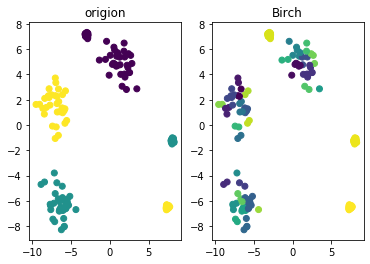

In [6]:
from sklearn.cluster import Birch

brc = Birch(n_clusters=None).fit(data)

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=target)
plt.title('origion')

plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=brc.labels_)
plt.title('Birch')